### The Problem: MNIST digit classification 
This exercise is adapted from https://victorzhou.com/blog/keras-neural-network-tutorial/

We’re going to tackle a classic machine learning problem: MNIST handwritten digit classification. It’s simple: given an image, classify it as a digit.

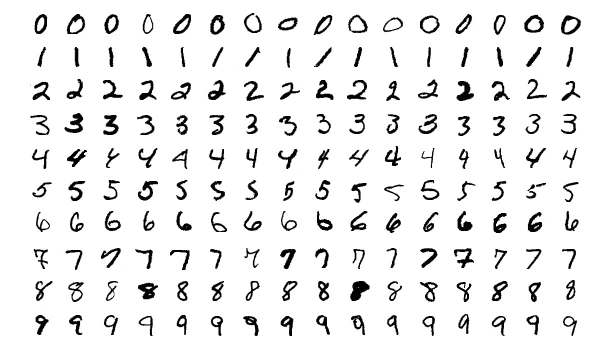


Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We’ll flatten each 28x28 into a 784 dimensional vector, which we’ll use is input to our neural network. Our output will be one of 10 possible classes: one for each digit.

Please check that you have the following packages installed (via conda or pip)
    keras tensorflow numpy mnist
    
### 1. Setup

In [2]:
!pip install mnist

In [3]:
#import all the required libraries
import numpy as np
import mnist
import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

**Q:** What's the dimension of the images data?

In [9]:
train_images.shape

(60000, 28, 28)

**Q:** What's the dimension of the label data?

In [7]:
train_labels.shape

(60000,)

**Note:** Curious about the dataset? try the following code. You can play around with the image_index value.


8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11
  104 159 159 232 195 102   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 154 227
  254 235 174 167 233 184   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 217 254 239
  159  23   0   0  68 221   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  72 249 251 131  11
    0   0  53  13   2  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26 243 250 

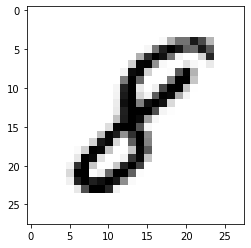

In [10]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000

print(train_labels[image_index]) # The label is 8
print(train_images[image_index])

plt.imshow(train_images[image_index], cmap='Greys')

### 2. Preparing the Data
As mentioned earlier, we need to flatten each image before we can pass it into our neural network. We’ll also normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values is often better).

In [11]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

**Q:** What's the dimension of the training and test images data?

In [12]:
train_images.shape

(60000, 784)

### 3. Building the Model
Every Keras model is either built using the Sequential class, which represents a linear stack of layers, or the functional Model class, which is more customizeable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

**Step:** Start by instantiating a Sequential model. 
* The first two layers have 64 nodes each and use the ReLU activation function. 
* The last layer is a Softmax output layer with 10 nodes, one for each class.

**Q:** what's the correct input shape for your input layer?

In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

### 4. Compiling the Model
Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

* The optimizer. We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers you can look into as well.
* The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter
* A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

**Step**: Compile the model using the above options - adam, categorical_crossentropy, accuracy as metrics

In [23]:
model.compile(
 loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

### 5. Training the Model
Training a model in Keras literally consists only of calling fit() and specifying some parameters. There are a lot of possible parameters, but we’ll only manually supply a few:

* The training data (images and labels), commonly known as X and Y, respectively.
* The number of epochs (iterations over the entire dataset) to train for.
* The batch size (number of samples per gradient update) to use when training.

**Step:** set epochs to a suitable number, and batch_size = 32


In [28]:
X_train, X_test, y_train, y_test = train_images, test_images, train_labels, test_labels

In [29]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical

# Train the model.
model.fit(X_train,y_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9832
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9843
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0465 - accuracy: 0.9843
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9851
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9852
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9857
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9868
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9869
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366 - accuracy: 0.9872
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

**Q:** Do you run into any problem? Why?

- 1 hot encoding is needed for categorical_crossentropy
- I use another loss function which is sparse_categorical_crossentropy

**Q:** what's your achieved accuracy?

99.21%

### 6. Testing the Model

**Step:** Evaluating the model by testing against the test data

In [31]:
model.evaluate(
    X_test, y_test, batch_size=32
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1463 - accuracy: 0.9740


[0.14631448686122894, 0.9739999771118164]

### 7. Using the Model
Now that we have a working, trained model, let’s put it to use. The first thing we’ll do is save it to disk so we can load it back up anytime.

**Step:** save the model using the save_weights function

In [34]:
model.save_weights("exer2model")

**Note:** What's the difference between model.save_weights and model.save? - https://stackoverflow.com/questions/42621864/difference-between-keras-model-save-and-model-save-weights#:~:text=save()%20saves%20the%20weights,to%20HDF5%20and%20nothing%20else.

### Challenge 1:
Retrain your model by using different network depths - what will you conclude?

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model1 = Sequential()
model1.add(Dense(64, input_dim=784, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model.compile(
 loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

# Train the model.
model.fit(X_train,y_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9921
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9925
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9923
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.022

### Challenge 2:
Retrain your model by using different activation (other than ReLU) - what differences does it make?

### Challenge 3:
Fit your model using validation_data option - What differences will that bring?

### Challenge 4:
How will you load your saved weights to use it in a separate code? Upload your saved model/weights, and compare your model/weights with a model/weights from one of your classmate's.

### Challenge 5:
How can you load any image from the data set and let your model (or your classmate's) to predict the image?